<a href="https://colab.research.google.com/github/dev-SR/Deep-Learning/blob/main/01-pytorch-basics/torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pytorch


**Resources**:

- [learnpytorch.io](https://www.learnpytorch.io/)


In [1]:
"""
cd .\01-pytorch-basics
jupyter nbconvert torch.ipynb --to markdown --output README.md
"""
import torch
import numpy as np
import matplotlib.pyplot as plt

## Creating tensors in PyTorch


In [25]:
a = [1, 2, 3]
b = np.array([4, 5, 6])
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
t_b2 = torch.tensor(b)

print(t_a)
print(t_b)
print(t_b2)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)
tensor([4, 5, 6], dtype=torch.int32)


In [109]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x = torch.ones(3, 2)
print(x)
x = torch.zeros(3, 2)
print(x)
x = torch.rand(3, 2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.0478, 0.0608],
        [0.1022, 0.7141],
        [0.3429, 0.3827]])


In [21]:
some_tensor = torch.rand(3, 4)

# Find out details about it
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}")  # will default to CPU

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [4]:
x = torch.linspace(0, 1, steps=5)
x

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])

In [9]:
x = torch.empty(3, 2)
print(x)
y = torch.zeros_like(x)
y

tensor([[1.3110e-31, 4.5790e-41],
        [3.7704e-37, 0.0000e+00],
        [4.4842e-44, 0.0000e+00]])


tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

## PyTorch to Numpy/Python


- PyTorch To `Numpy`


In [ ]:
torch.ones(7).numpy()

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

- PyTorch To `python`


In [ ]:
t = torch.rand(3)  # Creating a tensor with a single value
python_value = t[0].item()  # Extracting the Python scalar value
print(t, python_value)

tensor([0.7347, 0.0293, 0.7999]) 0.7346844673156738


In [ ]:
print("Python Native 1d: ", torch.ones(7).tolist())
print(
    "Python Native 2d: ",
    torch.tensor([[1, 2], [3, 4]]).tolist(),
)

Python Native 1d:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Python Native 2d:  [[1, 2], [3, 4]]


## Manipulating the data type and shape


The **torch.to()** function can be used to change the data type of a tensor to a desired type:


In [5]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


See [https://pytorch.org/docs/stable/tensor_attributes.html](https://pytorch.org/docs/stable/tensor_attributes.html) for all other data types.


Certain operations require that the input tensors have a certain number of dimensions (that is, rank) associated with a certain number of elements (shape). Thus, we might need to change the shape of a tensor, add a new dimension, or squeeze an unnecessary dimension


- Transposing a tensor:


In [6]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t.shape, " --> ", t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


- Reshaping a tensor (for example, from a 1D vector to a 2D array):


In [13]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t.shape, " --> ", t_reshape.shape)

t_reshape = t.view(5, 6)
print(t.shape, " --> ", t_reshape.shape)

torch.Size([30])  -->  torch.Size([5, 6])
torch.Size([30])  -->  torch.Size([5, 6])


`view()` attempts to reshape the tensor while sharing the underlying data (if possible), but it works only on contiguous tensors. On the other hand, `reshape()` is more versatile and creates a new memory allocation if needed, making it applicable to any tensor.


In [17]:
y = t.reshape(6, -1)  # 6 row; auto coloumn
print(y.shape)

torch.Size([6, 5])


- **Squeezing**: Removes dimensions with size 1, reducing the tensor's rank. For example:


In [29]:
t = torch.tensor([[1], [2], [3]])  # Tensor with shape (3, 1)
print(t, t.shape, "\n")
squeezed = t.squeeze()  # Removes the size 1 dimension
print(squeezed, t.shape)

tensor([[1],
        [2],
        [3]]) torch.Size([3, 1]) 

tensor([1, 2, 3]) torch.Size([3, 1])


Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.


- **Unsqueezing**: Adds a dimension with size 1 at the specified position. Example:


In [31]:
t = torch.tensor([1, 2, 3])  # Tensor with shape (3,)
print(t, t.shape, "\n")

unsqueezed = t.unsqueeze(1)  # Adds a dimension at position 1

print(unsqueezed, unsqueezed.shape)

tensor([1, 2, 3]) torch.Size([3]) 

tensor([[1],
        [2],
        [3]]) torch.Size([3, 1])


- You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the input gets turned into a view with new dims.


In [32]:
# Create tensor with specific shape
img_numpy = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
img_torch_format = img_numpy.permute(2, 0, 1)  # shifts axis 2->0, 0->1, 1->2,

print(f"Previous shape: {img_numpy.shape}")
print(f"New shape: {img_torch_format.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


## Tensor Operation


### Basic Operations


In [15]:
x = torch.ones([3, 2])
y = torch.ones([3, 2])

z = x + y
print(z)
z = x - y
print(z)
z = x * y  # Element-wise multiplication
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [16]:
z = y.add(x)
z

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

In [17]:
# modify inplace
z = y.add_(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


### 🚀Matrix multiplication (is all you need)


One of the most common operations in machine learning and deep learning algorithms (like neural networks) is matrix multiplication.

But to multiply a matrix by another matrix we need to do the **`"dot product"` of rows and columns** ...

Note: A matrix multiplication like this is also referred to as the dot product of two matrices.

Neural networks are full of matrix multiplications and dot products.


PyTorch implements matrix multiplication functionality in the `torch.matmul()`,`torch.mm()` method or `@` operator.

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:

- `(3, 2) @ (3, 2)` won't work
- `(2, 3) @ (3, 2)` will work
- `(3, 2) @ (2, 3)` will work

The resulting matrix has the shape of the outer dimensions:

- `(2, 3) @ (3, 2) -> (2, 2)`
- `(3, 2) @ (2, 3) -> (3, 3)`


In [92]:
X = torch.rand(100, 4)  # 100 sample of 4 features each
X.shape

torch.Size([100, 4])

In [93]:
W = torch.rand(3, 4)  # 3 hidden unit connected to 4 input
W.T.shape

torch.Size([4, 3])

In [94]:
a = X.matmul(W.T)
a.shape

torch.Size([100, 3])

The `torch.nn.Linear()` module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input x and a weights matrix A.


In [101]:
X = torch.rand(2, 4)  # 2 sample of 4 features each
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(
    in_features=4, out_features=6  # in_features = matches inner dimension of input
)  # 6 hidden unit connected to 4 input
output = linear(X)
print(f"Input shape: {X.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([2, 4])

Output:
tensor([[ 0.1644, -0.3716,  0.6903,  0.2284,  0.2870, -0.7039],
        [ 0.4176, -0.0611,  0.0467, -0.0456,  0.2174, -0.4366]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([2, 6])


## Split, stack, and concatenate tensors


- **Stacking**: Combines tensors along a new dimension. For instance:


In [46]:
A = torch.ones(2)
B = torch.zeros(2)
S = torch.stack([A, B])
print(S)

tensor([[1., 1.],
        [0., 0.]])


In [43]:
A = torch.ones(2)
B = torch.zeros(2)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.]])


- **Concatenating tensors** : Joins tensors along an existing dimensions


In [48]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


- **Splitting tensors**: Divides a tensor into multiple smaller tensors along a specified dimension.


In [41]:
t = torch.arange(start=1, end=9)
print(t)
# Providing the number of splits:
t_splits = torch.chunk(t, 3)
print(t_splits)
# Providing the sizes of different splits: (8 into 5 and 3)
t_splits = torch.split(t, split_size_or_sections=[5, 3])
print(t_splits)

tensor([1, 2, 3, 4, 5, 6, 7, 8])
(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8]))
(tensor([1, 2, 3, 4, 5]), tensor([6, 7, 8]))


## Finding the min, max, mean, sum, etc (aggregation)¶


In [105]:
# Create a tensor
x = torch.arange(0, 100, 10)
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}")  # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


You can also do the same as above with torch methods.


In [103]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max


This is helpful incase you just want the **position where the highest (or lowest) value is** and _not the actual value itself_ (we'll see this in a later when using the softmax activation function).


In [106]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


## 🔥AutoGrad


Autograd is a key feature of PyTorch that provides **automatic differentiation for all operations on tensors**. It allows developers to easily compute gradients of tensors with respect to other tensors. Autograd tracks all operations that are performed on tensors, creates a computation graph, and then uses the chain rule of differentiation to compute gradients. This feature is essential for training deep neural networks, as it allows us to efficiently calculate the gradients needed for optimization algorithms like stochastic gradient descent.


For the equation of $$z = 2x^{2} + 3y^{3}$$

The derivative of z with respect to x is:

$$\frac{\partial z}{\partial x} = 4x$$

The derivative of z with respect to y is:

$$\frac{\partial z}{\partial y} = 9y^{2}$$

Therefore, The derivative of $z=2x^2+3y^3$ with respect to $x$ evaluated at $x=2$ is:
$$\frac{\partial z}{\partial x}\bigg|_{x=2} = 4(2) = 8$$

And the derivative of $z$ with respect to $y$ evaluated at $y=1$ is:
$$\frac{\partial z}{\partial y}\bigg|_{y=1} = 9(1)^2 = 9$$


In [ ]:
# Define x and y as tensors with requires_grad=True
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

# Define z as a function of x and y
z = 2 * x**2 + 3 * y**3

# Compute the gradients of z with respect to x and y
z.backward()

# Print the gradients
print("Gradient of z with respect to x:", x.grad)
print("Gradient of z with respect to y:", y.grad)

Gradient of z with respect to x: tensor(8.)
Gradient of z with respect to y: tensor(9.)


Building autograd feature from scratch : [building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0)


## 🔥Running tensors on GPUs


In [2]:
!nvidia-smi

Sun Feb 26 20:02:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Check for GPU
import torch

torch.cuda.is_available()

True

In [6]:
# Count number of devices
torch.cuda.device_count()

1

In [4]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

- Let's try creating a tensor and putting it on the GPU (if it's available).


In [9]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

- Moving tensors back to the CPU


In [10]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: ignored

In [11]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu  # The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

array([1, 2, 3])

In [12]:
# The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## 🔥Building input pipelines in PyTorch


Applying preprocessing functions manually every time can be quite cumbersome. Luckily, PyTorch
provides a special class for constructing efficient and convenient preprocessing pipelines. In this section,
we will see an overview of different methods for constructing a PyTorch Dataset and DataLoader,
and implementing data loading, shuffling, and batching.


### Creating a PyTorch DataLoader from existing tensors


If the data already exists in the form of a tensor object, a Python list, or a NumPy array, we can easily
create a dataset loader using the `torch.utils.data.DataLoader()` class. It returns an object of the
DataLoader class, which we can use to iterate through the individual elements in the input dataset. As
a simple example, consider the following code, which creates a dataset from a list of values from 0 to 5:


In [6]:
from torch.utils.data import DataLoader

t = torch.arange(5, dtype=torch.float32)
data_loader = DataLoader(t)
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])


If we want to create batches from this dataset, with a desired batch size of 3, we can do this with the
`batch_size` argument as follows:


In [8]:
data_loader = DataLoader(t, batch_size=2, drop_last=True)
for i, batch in enumerate(data_loader, 1):
    print(f"batch {i}:", batch)

batch 1: tensor([0., 1.])
batch 2: tensor([2., 3.])


The optional `drop_last` argument is useful for cases when the number of elements in the tensor is not divisible by the desired batch size. We can drop the last non-full batch by setting `drop_last` to `True`.


### Combining two tensors into a joint dataset


Often, we may have the data in two (or possibly more) tensors. **For example, we could have a tensor
for features and a tensor for labels**. In such cases, we need to build a dataset that combines these
tensors, which will allow us to **retrieve the elements of these tensors in tuples.**


In [9]:
import sys

sys.path.append("..")  # Add the parent directory to the path
from plot import plot_decision_regions

from global_helpers import *

(1000, 2) (1000,)


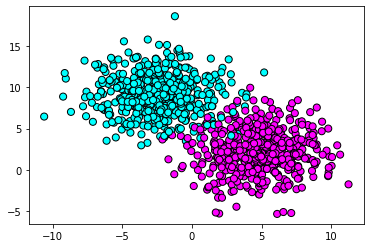

In [10]:
X_train, X_test, y_train, y_test = generate_blob_cluster(split_train_test=True)

Now, we want to create a joint dataset from these two tensors. We first need to create a Dataset class
as follows:


In [11]:
from torch.utils.data import Dataset


class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, i):
        return self.x[i], self.y[i]

A custom Dataset class must contain the following methods to be used by the data loader later on:

- `__init__()`: This is where the initial logic happens, such as reading existing arrays, loading a
  file, filtering data, and so forth.
- `__getitem__()`: This returns the corresponding sample to the given index.


In [66]:
joint_dataset = JointDataset(X_train, y_train)
for x, y in joint_dataset:
    print(" x: ", x, " y: ", y)
    break

 x:  [9.39285555 1.82151765]  y:  1


Instead of defining a custom Dataset class, the `torch.utils.data.TensorDataset` class can be used to create a combined dataset if the dataset is in tensor form and follows a labeled structure. This class allows for easy combination of datasets, simplifying the process of creating a joint dataset.


In [72]:
from torch.utils.data import TensorDataset

joint_dataset = TensorDataset(
    torch.tensor(X_train).float(), torch.tensor(y_train).float()
)
for x, y in joint_dataset:
    print(" x: ", x, " y: ", y)
    break

 x:  tensor([9.3929, 1.8215])  y:  tensor(1.)


### Shuffle, batch, and repeat


We know, when training an NN model using stochastic gradient descent optimization, it is important to feed training data as **randomly shuffled batches**.


First, let’s create a shuffled version data loader from the `joint_dataset` dataset:


In [94]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
for i, batch in enumerate(data_loader, start=1):
    print(f"batch {i}:")
    for x, y in zip(batch[0], batch[1]):
        print(f"    x: {x} y: {y}")
    if i == 2:
        break

batch 1:
    x: tensor([-7.5721,  9.4804]) y: 0.0
    x: tensor([-3.4895,  5.3555]) y: 0.0
batch 2:
    x: tensor([7.3366, 1.8769]) y: 1.0
    x: tensor([3.1886, 3.4446]) y: 1.0


The rows are shuffled without losing the one-to-one correspondence between the entries in x and y.

In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset
by the desired number of epochs. So, let’s iterate over the batched dataset twice:


In [95]:
for epoch in range(2):
    print(f"epoch {epoch+1}")
    for i, batch in enumerate(data_loader, 1):
        print(f"    batch {i}:")
        for x, y in zip(batch[0], batch[1]):
            print(f"        x: {x} y: {y}")
        if i == 2:
            break

epoch 1
    batch 1:
        x: tensor([1.9091, 1.1821]) y: 1.0
        x: tensor([-3.0946,  8.4289]) y: 0.0
    batch 2:
        x: tensor([-3.8032,  9.5738]) y: 0.0
        x: tensor([-1.2569,  6.5704]) y: 0.0
epoch 2
    batch 1:
        x: tensor([8.3716, 1.2954]) y: 1.0
        x: tensor([-6.4953,  7.5158]) y: 0.0
    batch 2:
        x: tensor([5.4378, 5.3243]) y: 1.0
        x: tensor([2.3215, 2.5691]) y: 1.0


### Creating a dataset from files on your local storage disk


In [118]:
import pathlib

imgdir_path = pathlib.Path("data")
file_list = list(imgdir_path.glob("*.jpg"))

sorted([str(path) for path in file_list])

['data\\cat.1.jpg',
 'data\\cat.2.jpg',
 'data\\cat.3.jpg',
 'data\\dog.1.jpg',
 'data\\dog.2.jpg',
 'data\\dog.3.jpg']

Image shape: (280, 300, 3)
Image shape: (396, 312, 3)
Image shape: (414, 500, 3)
Image shape: (499, 327, 3)
Image shape: (199, 187, 3)
Image shape: (375, 499, 3)


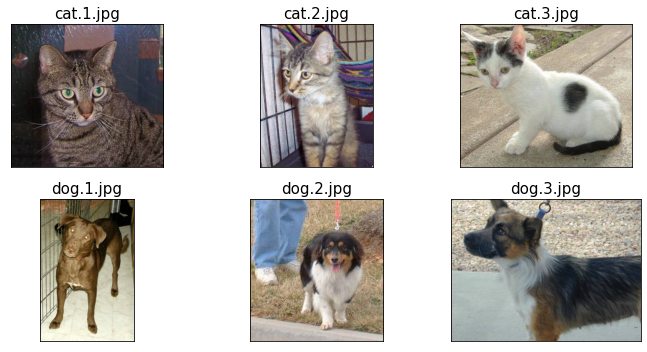

In [119]:
import matplotlib.pyplot as plt
from PIL import Image

fig = plt.figure(figsize=(10, 5), facecolor="w")
for i, file in enumerate(file_list):
    img = Image.open(file)
    print("Image shape:", np.array(img).shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(file.name, size=15)
plt.tight_layout()
plt.show()

In [121]:
labels = [1 if "dog" in file.name else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [122]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

data\cat.1.jpg 0
data\cat.2.jpg 0
data\cat.3.jpg 0
data\dog.1.jpg 1
data\dog.2.jpg 1
data\dog.3.jpg 1


Next, we need to apply transformations to this dataset: load the image content from its file path, decode
the raw content, and resize it to a desired size, for example, `80×120`. We use the `torchvision.transforms` module to resize the images and convert the loaded pixels into tensors as follows:


In [123]:
import torchvision.transforms as transforms

img_height, img_width = 80, 120
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((img_height, img_width)),
    ]
)

Now we update the ImageDataset class with the transform we just defined:


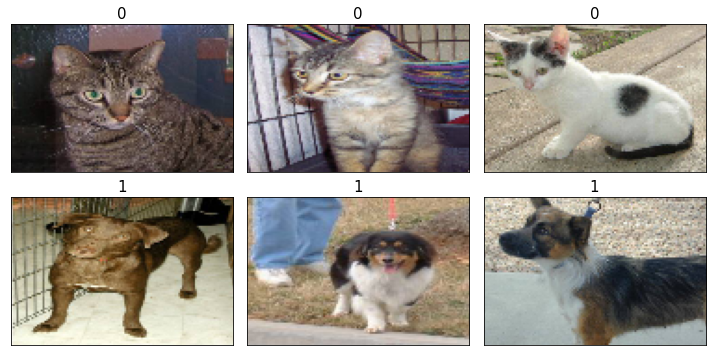

In [129]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels, transform)

fig = plt.figure(figsize=(10, 5), facecolor="w")
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f"{example[1]}", size=15)
plt.tight_layout()
plt.show()

The `__getitem__` method in the ImageDataset class wraps all four steps into a single function, including
_the loading of the raw content (images and labels), decoding the images into tensors, and resizing the
images_. The function then returns a dataset that we can iterate over and apply other operations that
we learned about in the previous sections via a data loader, such as _shuffling and batching._
